# 1 Introduction

In this lesson, you will continue to discover techniques to **improve the optimization** problem of adapting neural network model weights to learn a training dataset. Furthermore, it will be presented techniques that you can use to reduce overfitting and **improve the generalization** of your deep learning neural network models. After complete this study, you will know:

- Improve the generalization
  - How techniques that reduce model complexity have a **regularizing** effect resulting in less overtting and better generalization.
  - How to add a **penalty to the loss function** to encourage **smaller model weights (L2)**.
  - How to add a **penalty to the loss function** to encourage **sparse internal representations (L1)**.
  - How to add a **constraint to the model** to force **small model weights** and lower complexity models.
  - How to add **dropout** weights during training to decouple model layers.
  - How to **add noise** to the training process to promote model robustness.
  - How to use **early stopping** to halt model training at the right time.



# 2 Better Generalization

## 2.1 Fix overfitting with regularization

Training a deep neural network that can generalize well to new data is a challenging problem. A model with too little capacity cannot learn the problem, whereas a model with too much capacity can learn it too well and overfit the training dataset. Both cases result in a model that does not generalize well. 

> A modern approach to reducing generalization error is to use a larger model that may be required to use **regularization during training** that keeps the model's weights small. 

These techniques reduce overfitting and lead to faster optimization of the model and better overall performance. This section will discover the problem of overfitting when training neural networks and how it can be addressed with regularization methods. After reading this section, you will know:

- **Underfitting can quickly** be addressed by increasing the network's capacity, but overfitting requires the use of specialized techniques.
- Regularization methods like **weight decay** provide an easy way to **control overfitting** for sizeable neural network models.
- A modern recommendation for regularization is to use **early stopping** with **dropout** and a **weight constraint**.

### 2.1.1 Problem of model generalization and overfitting

A neural network's objective is to have a final model that performs well on the data that we used to train it (e.g., the training dataset) and the new data on which the model will be used to make predictions.

> The central challenge in machine learning is that we must perform well on new, previously unseen inputs - not just those on which our model was trained. The ability to perform well on previously unobserved inputs is called **generalization**.

We require that the model learn from known examples and generalize them to new examples in the future. We use methods like a train/test split or k-fold cross-validation to estimate the model's ability to generalize to new data. **learning and also generalizing to new cases is challenging**. 

Too little learning and the model will perform poorly on
the training dataset and on new data. **The model will underfit the problem**. 

Too much learning and the model will perform well on the training dataset and poorly on new data, the model will **overfit the problem**. In both cases, the model has not been generalized.



A model fit can be considered in the context of the <font color="red">bias-variance trade-off</font>. 

> An underfit model has high bias and low variance. 

Regardless of the specific samples in the training data, it cannot learn the problem. 
> An overfit model has low bias and high variance. 

The model learns the training data too well and performance varies widely with new unseen examples or even statistical noise added to examples in the training dataset.

**We can address underfitting by increasing the capacity of the model**. 

> Capacity refers to a model's ability to fit a variety of functions; more capacity means that a model can fit more types of functions for mapping inputs to outputs. 

Increasing the capacity of a model is
easily achieved by changing the structure of the model, such as adding more layers and/or more nodes to layers. Because an underfit model is so easily addressed, it is more common to have an
overfit model. 

**An overfit model is easily diagnosed by monitoring the model's performance during training** by evaluating both a training dataset and a holdout validation dataset. Graphing line plots of the performance of the model during training, called learning curves, will show a familiar pattern.

### 2.1.2 Reduce Overfitting by Constraining Complexity

There are two ways to approach an overfit model:

1. Reduce overfitting by training the network on more examples.
2. Reduce overfitting by changing the complexity of the network.

A benefit of very deep neural networks is that their performance improves as they are fed larger and larger datasets. A model with a near-infinite number of examples will eventually plateau in terms of the network's capacity is capable of learning. **A model can overfit a training dataset because it has sufficient capacity to do so**. Reducing the model's capacity reduces the likelihood of the model overfitting the training dataset to a point where it no longer overfits. The capacity of a neural network model, its complexity, is defined by its structure in terms of nodes and layers and the parameters in terms of its weights. Therefore, **we can reduce the complexity of a neural network to reduce overfitting in one of two
ways**:

1. Change network complexity by changing the network structure (number of weights).
2. Change network complexity by changing the network parameters (values of weights).

For example, the structure could be tuned via grid search until a suitable number of nodes and/or layers are found to reduce or remove overfitting for the problem. Alternately, the model could be overfitted and pruned by removing nodes until it achieves suitable performance on
a validation dataset. It is more common to instead constrain the model's complexity by **ensuring the parameters (weights) of the model remain small**. Small parameters suggest a less complex and, in turn, more stable model that is less sensitive to statistical fluctuations in the
input data.

> **Regularization** is any modification we make to a learning algorithm that is intended to **reduce its generalization error** but not its training error. Regularization is one of the central concerns of the field of machine learning, rivaled in its importance only by optimization.

### 2.1.3 Regularization Methods for Neural Networks

The simplest and perhaps **most common regularization method** is to **add a penalty to the loss function** in proportion to the weights' size in the model.


<font color="red">Weight Regularization:</font> Penalize the model during training **based on the magnitude of the weights**.

> This will encourage the model to map the inputs to the outputs of the training dataset so that the weights of the model are kept small. This approach is called weight regularization of **weight decay** and has proven very effective for decades for both more straightforward linear
models and neural networks.

Below is a list of five of the most common additional regularization methods.

- **Activity Regularization**: Penalize the model during training based on the magnitude
of the activations.
- **Weight Constraint**: Constrain the magnitude of weights to be within a range or below a limit.
- **Dropout**: Probabilistically remove inputs during training.
- **Noise**: Add statistical noise to inputs during training.
- **Early Stopping**: Monitor model performance on a validation set and stop training when performance degrades.

Some more specific recommendations include:

- **Classical**: use early stopping and weight decay (L2 weight regularization).
- **Alternate**: use early stopping and added noise with a weight constraint.
- **Modern**: use early stopping and dropout, in addition to a weight constraint.

## 2.2 Penalize Large Weights with Weight Regularization

Neural networks learn a set of weights that best map inputs to outputs. **A network with large network weights can sign an unstable network** where small changes in the input can lead to large changes in the output. This can signify that the network has overfitted the training dataset and will likely perform poorly when making predictions on new data. 

A solution to this problem is to update the learning algorithm to encourage the network to keep the weights small. This is called **weight regularization**, and it can be used as a general technique to reduce
the overfitting of the training dataset and improve the model's generalization. In this section, you will discover weight regularization as an approach to reduce overfitting for neural networks. After reading this tutorial, you will know:

- Large weights in a neural network signify a more complex network that has overfit the training data.
- Penalizing a network based on the size of the network weights during training can reduce overfitting.
- An L1 or L2 vector norm penalty can be added to the network's optimization to encourage smaller weights.



### 2.2.1 Weight Regularization


When fitting a neural network model, we must learn the network's weights (i.e., the model parameters) using stochastic gradient descent and the training dataset. The longer we train the network, the more specialized the weights will become to the training data, overfitting the training data. The weights will grow in size to handle the specifics of the examples seen
in the training data. **Large weights make the unstable network**. Although the weights will be specialized to the training dataset, minor variation or statistical noise on the expected inputs will result in large differences in the output.

Generally, **we refer to this model as having a large variance and a small bias**. That is, the model is sensitive to the specific examples, the statistical noise, in the training dataset. 

> A model with large weights is more complex than a model with smaller weights. 

It is a sign of a network that may be overly specialized to training data. In practice, we prefer to choose the simpler
models to solve a problem. **We prefer models with smaller weights**.

Another possible issue is that there may be many input variables, each with different relevance levels to the output variable. Sometimes we can use methods to help select input variables, but the interrelationships between variables are often not obvious. **Having small weights
or even zero weights for less relevant or irrelevant inputs to the network will allow the model to focus on learning**. This, too, will result in a simpler model.

### 2.2.2 Encourage Small Weights

The learning algorithm can be updated to encourage the network toward using small weights. One way to do this is to change the calculation of loss used in the network's optimization to consider the weights' size. Remember that we minimize a loss function when we train a neural network, such as the log loss in classification or mean squared error in regression. **We can add the current size of all weights in the network** or add a layer to this calculation in calculating the loss between the predicted and expected values in a batch. **This is called a penalty because we are penalizing the model proportional to the size of the weights in the model.**

> Many regularization approaches are based on limiting the capacity of models, such
as neural networks, linear regression, or logistic regression, by adding a [...] penalty to the objective function.

**Larger weights result in a larger penalty in the form of a larger loss score.** The optimization algorithm will then push the model to have smaller weights, i.e., weights no larger than needed to perform well on the training dataset. 

**Smaller weights are considered more regular or less specialized**, and as such, we refer to this penalty as **weight regularization**. When this approach of penalizing model coefficients is used in other machine learning models such as linear regression or logistic regression, it may be referred to as **shrinkage** because the penalty encourages the
coefficients shrink during the optimization process.

> The addition of a weight size penalty or weight regularization to a neural network has the effect of reducing generalization error and of allowing the model to pay less attention to less relevant input variables.

### 2.2.3 How to Penalize Large Weights

There are two parts to penalizing the model based on the size of the weights. The first is the calculation of the **size of the weights**, and the second is **the amount of attention** that the optimization process should pay to the penalty.

**Calculate Weight Size**

Neural network weights are real-values that can be positive or negative, as such, simply adding the weights is not sufficient. There are two main approaches used to calculate the size of the weights, they are:

- Calculate the sum of the absolute values of the weights, called the L1 norm (or $L^1$).
- Calculate the sum of the squared values of the weights, called the L2 norm (or $L^2$).

> L1 encourages weights to 0.0 if possible, resulting in more sparse weights (weights with more 0.0 values). 

> L2 offers more nuance, both penalizing larger weights more severely but resulting in less sparse weights. 

The use of L2 in linear and logistic regression is often referred to as **Ridge Regression**. This is useful when trying to develop an intuition for the penalty or examples of its usage.

**Control Impact of the Penalty**

The calculated size of the weights is added to the loss objective function when training the network. Rather than adding each weight to the penalty directly, they can be weighted using a new hyperparameter called alpha ($\alpha$) or sometimes lambda. 

This controls the amount of attention that the learning process should pay to the penalty. Put another way, the amount to penalize the model based on the size of the weights. 

> The $\alpha$ hyperparameter has a value between 0.0 (no penalty) and 1.0 (full penalty). This hyperparameter controls the model's amount of bias from 0.0, or low bias (high variance), to 1.0, or high bias (low variance).

- If the penalty is too strong, the model will underestimate the weights and underfit the problem. 
- If the penalty is too weak, the model will be allowed to overfit the training data. 

The vector norm of the weights is often calculated per-layer rather than across the entire network.

This allows more flexibility in the choice of the type of regularization used (e.g., L1 for inputs, L2 elsewhere) and flexibility in the $\alpha$ value, although **it is common to use the same $\alpha$
value on each layer by default.**

### 2.2.4 Weight Regularization Case Study

This section will **demonstrate how to use weight regularization** to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying weight regularization to your neural network for classification and regression problems.

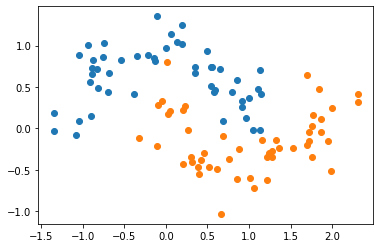

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])

# show plot
plt.show()

#### 2.2.4.1 Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is necessary to ensure the model overfits. Before defining the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the t model's performance.

In [4]:
import tensorflow as tf
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=200, verbose=1,
    mode='auto', restore_best_weights=True
)

Restoring model weights from the end of the best epoch.
Epoch 01171: early stopping
Train: 1.000, Test: 0.929


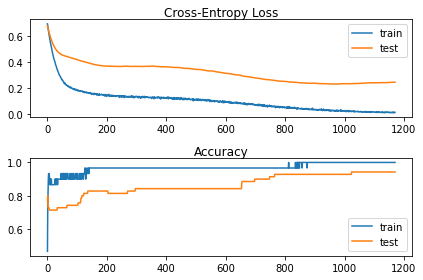

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y), 
                    epochs=4000, verbose=0,batch_size=32,
                    callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Line plots showing learning curves of cross-entropy loss and classification accuracy on the train and test sets for each training epoch are also created. **The learning curve for loss shows a clear overfitting pattern**, mirrored in the learning curve for the classification accuracy.

#### 2.2.4.2 MLP Model With Weight Regularization

In [ ]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu',
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

We would expect that it would have also changed the telltale learning curve for overfitting through weight regularization. Instead of improving the model's accuracy on the test set increasing and then decreasing again, we should see it continually rise during training. As expected, we see the learning curves for loss and accuracy on the test dataset plateau, indicating that the model has no longer overt the training dataset.

#### 2.2.4.3 Grid Search Regularization Hyperparameter

In [ ]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
  model.add(Dropout(0.1))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	
  # fit model
	model.fit(train_x, train_y, epochs=4000, verbose=0, callbacks=[early])
 
	# evaluate the model
	_, train_acc = model.evaluate(train_x, train_y, verbose=0)
	_, test_acc = model.evaluate(test_x, test_y, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)
 
# plot train and test means
plt.semilogx(values, all_train, label='train', marker='o')
plt.semilogx(values, all_test, label='test', marker='o')
plt.legend()
plt.show()

A line plot of the results is also created, showing the increase in test accuracy with larger weight regularization parameter values, at least to a point. We can see that using the largest value of 0.1 results in a large drop in both train and test accuracy.

## 2.3 Force Small Weights with Weight Constraints

Weight regularization methods like weight decay introduce a penalty to the loss function when training a neural network to encourage the network to use small weights. Smaller weights in a neural network can result in a model that is more stable and less likely to overfit the training
dataset, in turn, have better performance when making a prediction on new data. 

> Unlike weight regularization, a weight constraint is a trigger that checks the size or magnitude of the weights and scales them so that they are all below a pre-defined threshold. 

The constraint forces weights to be small and can be used instead of weight decay and in conjunction with more aggressive network configurations, such as very large learning rates. **In this section, you
will discover the use of weight constraint regularization as an alternative to weight penalties to reduce overfitting in deep neural networks**. After reading this section, you will know:

- Weight penalties encourage but do not require neural networks to have small weights.
- Weight constraints, such as the L2 norm and maximum norm, can be used to force neural networks to have small weights during training.
- Weight constraints can improve generalization when used in conjunction with other regularization methods like a dropout.

### 2.3.1 Weight Constraints

In this section you will discover the problem with neural networks that have large weighs, a technique that you can use to force the development of models with small weights called **weight
constraints** and tips for using this technique in your own projects.

#### 2.3.1.1 Alternative to penalties for large weights

**Large weights in a neural network are a sign of overfitting**. A network with large weights has very likely learned the statistical noise in the training data. This results in a model that is unstable and very sensitive to changes to the input variables. 

> In turn, the overfit network
has poor performance when making predictions on new unseen data. 

A popular and effective technique to address the problem is to update the loss function that is optimized during training to take the size of the weights into account.

This is called a penalty, as the larger the weights of the network become, the more the network is penalized, resulting in larger loss and, in turn, larger updates. The effect is that the penalty encourages weights to be small or no larger than is required during the training process, in turn reducing overfitting. 

> A problem in using a penalty is that although it does encourage the network toward smaller weights, it does not force smaller weights. **A neural network trained with weight regularization penalty may still allow large weights, in some cases very large weights.**


#### 2.3.1.2 Force Small Weights

**An alternate solution to using a penalty for the size of network weights is to use a weight constraint**. A weight constraint is an update to the network that checks the size of the weights (e.g., their vector norm), and if the size exceeds a predefined limit, the weights are rescaled so
that their size is below the limit or between a range. You can think of a weight constraint as an if-then rule checking the size of the weights while the network is being trained and only coming into effect and making weights small when required. Note, for efficiency; it does not have to be
implemented as an if-then rule and often is not.

Unlike adding a penalty to the loss function, a weight constraint ensures the weights of the network are small instead of merely encouraging them to be small. It can be useful on those problems or with networks that resist other regularization methods, such as weight penalties. Weight constraints prove especially useful when you have configured your network to use alternative regularization methods to weight regularization and yet still desire the network to have small weights in order to reduce overfitting. 

> One often-cited example is the use of a **weight constraint regularization with dropout regularization**.

#### 2.3.1.3 How to use a weight constraint

A constraint is enforced on each node within a layer. All nodes within the layer use the same constraint, and often multiple hidden layers within the same network will use the same constraint.

Recall that when we talk about the vector norm in general, that this is the magnitude of the vector of weights in a node, and by default, is calculated as the L2 norm, e.g., the square root of the sum of the squared values in the vector. Some examples of constraints that could be used
include:

- Force the vector norm to be 1.0 (e.g., the unit norm).
- Limit the maximum size of the vector norm (e.g., the maximum norm).
- Limit the minimum and maximum size of the vector norm (e.g., the min-max norm).

The **maximum norm**, also called max-norm or maxnorm, is a popular constraint because it is less aggressive than other norms such as the unit norm, simply setting an upper bound.

When **using a limit or a range**, a hyperparameter must be specified. Given that weights are small, the hyperparameter, too, is often a small integer value, such as a value between 1 and 4.

If the **norm exceeds the specified range or limit**, the weights are rescaled or normalized such that their magnitude is below the specified parameter or within the specified range.

> The constraint can be applied after each update to the weights, e.g., at the end of each minibatch.

The Keras API supports weight constraints. The constraints are specified per-layer but applied and enforced per-node within the layer. Using a constraint generally involves setting the **kernel\_constraint** argument on the layer for the input weights and the **bias\_constraint** for the bias weights. **Generally, weight constraints are not used on the bias weights**. A suite of different vector norms can be used as constraints, provided as classes in the **keras.constraints** module. They are:

- **Maximum norm** (max\_norm), to force weights to have a magnitude at or below a given limit.
- **Non-negative norm** (non\_neg), to force weights to have a positive magnitude.
- **Unit norm** (unit\_norm), to force weights to have a magnitude of 1.0.
- **Min-Max norm** (min\_max\_norm), to force weights to have a magnitude between a range.

### 2.3.2 Weight Constraints Case Study

In this section, **we will demonstrate how to use weight constraints to reduce overfitting of an MLP on a simple binary classification problem**. This example provides a template for applying weight constraints to your own neural network for classification and regression problems.

In [ ]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()

#### 2.3.2.1 Overfit multilayer perceptron

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Running the example reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

#### 2.3.2.2 Overfit MLP With Weight Constraint

We can update the example to use a weight constraint. There are a few different weight
constraints to choose from. A good simple constraint for this model is to simply normalize the weights so that the norm is equal to 1.0. 

This constraint has the effect of forcing all incoming weights to be small. We can do this by using the unit norm in Keras. This constraint can be added to the first hidden layer as follows:

```python
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
```

We can also achieve the same result by using the min max norm and setting the min and maximum to 1.0, for example:

```python
model.add(Dense(500, input_dim=2, activation='relu',kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))
```

We cannot achieve the same result with the maximum norm constraint as it will allow norms at or below the specied limit; for example:

```python
model.add(Dense(500, input_dim=2, activation='relu',kernel_constraint=max_norm(1.0)))
```

In [ ]:
# mlp overfit on the moons dataset with a unit norm constraint
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import unit_norm
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Reviewing the line plot of train and test loss and accuracy, we can see that it no longer appears that the model has overfit the training dataset. Model accuracy on both the train and test sets continues to improve to a plateau.

## 2.4 Decouple Layers with Dropout

Deep learning neural networks are likely to quickly overfit a training dataset with few examples. Ensembles of neural networks with different model configurations are known to reduce overfitting but require the additional computational expense of training and maintaining multiple models. 

> A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. 

This is called **dropout** and **offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and
generalization error in deep neural networks of all kinds**. 

In this section, you will discover the use of dropout regularization for reducing overfitting and improving the generalization of deep neural networks. After reading this section, you will know:

- Large weights in a neural network are a sign of a more complex network that has overfitted the training data.
- Probabilistically dropping out nodes in the network is a simple and effective regularization method.
- A large network with more training epochs and the use of a weight constraint is suggested when using dropout.

### 2.4.1 Dropout

In this section you will discover that you can simulate the development of a large ensemble of neural network models in a single model called **dropout**, how you can use it to reduce overfitting, and tips for using this technique on your own projects.

#### 2.4.1.1 Problem With Overfitting

Large neural nets trained on relatively small datasets can overfit the training data. This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g., a test dataset. Generalization error
increases due to overfitting. One approach to reducing overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models,
called an ensemble.

> A problem even with the ensemble approximation is that it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

#### 2.4.1.2 Randomly Drop Nodes

**Dropout is a regularization method** that approximates training a large number of neural networks with different architectures in parallel. 

> During training, some number of node outputs are randomly ignored or dropped out. 

This has the effect of making the layer look-like and be
treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different view of the configured layer.

> **Dropout has the effect of making the training process noisy**, forcing nodes within a layer to probabilistically take on more or less responsible for the inputs.

This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

Because the outputs of a layer under dropout are randomly subsampled, it has the effect of reducing the capacity or thinning the network during training. As such, a wider network, e.g., more nodes, may be required when using dropout.

#### 2.4.1.3 How to Dropout

Dropout is implemented per-layer in a neural network. It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long
short-term memory network layer. 

> Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. **It is not used on the output layer**.


**A new hyperparameter** is introduced that specifies the probability at which outputs of the layer are dropped out, or inversely, the probability at which outputs of the layer are retained.

The interpretation is an implementation detail that can differ from paper to code library. 

> A common value is a probability of 0.5 for retaining the output of each node in a hidden layer and a value close to 1.0, such as 0.8, for retaining inputs from the visible layer.

**Dropout is not used after training when making a prediction with the fit network**. The weights of the network will be larger than normal because of dropout. Therefore, before finnalizing
the network, the weights are firrst scaled by the chosen dropout rate. The network can then be used as per normal to make predictions.

The rescaling of the weights can be performed at training time instead, after each weight update at the end of the minibatch. 

> This is sometimes called **inverse dropout** and does not
require any modification of weights during training. Both the Keras and PyTorch deep learning libraries implement dropout in this way.

**Dropout works well in practice**, perhaps replacing the need for weight regularization (e.g. weight decay) and activation regularization (e.g. representation sparsity).

### 2.4.2 Dropout Case Study

In [ ]:
# scatter plot of circles dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
 
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()

#### 2.4.2.1 Overfit multilayer perceptron

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

#### 2.4.2.2 MLP with dropout regularization

We can update the example to use dropout regularization. We can do this by simply inserting a new Dropout layer between the hidden layer and the output layer. In this case, we will specify a dropout rate (probability of setting outputs from the hidden layer to zero) to 40% or 0.4.

```python
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

In [ ]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

In this specific case, we can see that dropout resulted in a slight drop in accuracy on the training dataset, down from 100% to 96%, and a lift in accuracy on the test set, up from 75% to 80%.

Reviewing the line plot of train and test accuracy during training, we can see that it no longer appears that the model has overfit the training dataset. Model accuracy on both the train and test sets continues to increase to a plateau, albeit with a lot of noise given the use of dropout during training.

## 2.5 Promote Robustness with Noise

Training a neural network with a small dataset can cause the network to memorize all training examples, in turn leading to poor performance on a holdout dataset. Small datasets may also represent a harder mapping problem for neural networks to learn, given the patchy or sparse
a sampling of points in the high-dimensional input space. 

> One approach to making the input space smoother and easier to learn is to add noise to inputs during training. 

In this section, **you will discover that adding noise to a neural network during training can improve the robustness of the network, resulting in better generalization and faster learning**. 

After reading this section, you will know:

- Small datasets can make learning challenging for neural nets, and the examples can be memorized.
- Adding noise during training can make the training process more robust and reduce generalization error.
- Noise is traditionally added to the inputs but can also be added to weights, gradients, and even activation functions.

### 2.5.1 Noise Regularization

In this section, you will discover the brittleness of large network weights and how the addition of statistical noise can provide a regularizing effect, as well as tips to help when adding noise to your own neural network models.

#### 2.5.1.1 Add Random Noise During Training

One approach to improving generalization error and to improving the structure of the mapping problem is to add random noise.

At first, this sounds like a recipe for making learning more challenging. It is a counter-intuitive suggestion to improving performance because one would expect noise to degrade performance of the model during training.

> Heuristically, we might expect that the noise will 'smear out' each data point and make it dicult for the network to fit individual data points precisely, and hence will reduce overfitting. In practice, it has been demonstrated that training with noise can indeed lead to improvements in network generalization.

The addition of noise during the training of a neural network model has a regularization effect and, in turn, improves the robustness of the model. It has been shown to have a similar impact on the loss function as the addition of a penalty term, as in the case of weight regularization
methods.

In effect, adding noise expands the size of the training dataset. Each time a training sample is exposed to the model, random noise is added to the input variables making them different every time it is exposed to the model. In this way, adding noise to input samples is a simple
form of **data augmentation**.

> Injecting noise in the input to a neural network can also be seen as a form of data
augmentation.

**Adding noise means that the network is less able to memorize training samples because they are changing all of the time**, resulting in smaller network weights and a more robust network that has lower generalization error. The noise means that it is as though new samples are being drawn from the domain in the vicinity of known samples, smoothing the structure of the input space. This smoothing may mean that the mapping function is easier for the network to learn, resulting in better and faster learning.

#### 2.5.1.2 How and Where to Add Noise

The most common type of **noise used during training** is the addition of **Gaussian noise** to input variables. Gaussian noise, or white noise, has a **mean of zero and a standard deviation of one** and can be generated as needed using a pseudorandom number generator. The addition of Gaussian noise to the inputs to a neural network was traditionally referred to as **jitter or random jitter** after the use of the term in signal processing to refer to the uncorrelated random noise
in electrical circuits. 

> The amount of noise added (e.g. the spread or standard deviation) is a configurable hyperparameter. 

**Too little noise has no effect, whereas too much noise makes the
mapping function too challenging to learn.**

The **standard deviation of the random noise** controls the amount of spread and can be adjusted based on the scale of each input variable. It can be easier to configure if the scale of the input variables has first been normalized. <font color='red'>Noise is only added during training</font>. No noise is added during the evaluation of the model or when the model is used to make predictions on new data.

Although additional noise to the inputs is the most common and widely studied approach, random noise can be added to other network parts during training. Some examples include:

- **Add noise to activations**, i.e., the outputs of each layer.
- **Add noise to weights**, i.e., an alternative to the inputs.
- **Add noise to the gradients**, i.e., the direction to update weights.
- **Add noise to the outputs**, i.e., the labels or target variables.

The **addition of noise** to the **layer activations** allows noise to be used at any point in the network. This can be **beneficial for very deep networks**. Noise can be added to the layer outputs themselves, but this is more likely achieved via a noisy activation function. 

The **addition of noise** to **weights** allows the approach to be used throughout the network consistently instead of adding noise to inputs and layer activations. This is **particularly useful in recurrent neural networks**.

The **addition of noise** to **gradients** focuses more on **improving the optimization process's robustness** rather than the structure of the input domain. The amount of noise can start high at the beginning of training and decrease over time, much like a decaying learning rate.
This approach has proven to be an effective method for very deep networks and a variety of different network types.

> Adding noise to the activations, weights, or gradients all provides a more generic approach to adding noise invariant to the types of input variables provided to the model. 

If the problem domain is believed or expected to have mislabeled examples, then the addition of noise
to the class label can improve the model's robustness to this type of error. Although, it can be easy to derail the learning process. Adding noise to a continuous target variable in the case of regression or time series forecasting is much like the addition of noise to the input variables and
maybe a better use case.

> Noise can be added to training regardless of the type of problem that is being addressed. It is appropriate to try adding noise to both classification and regression type problems. The type of noise can be specialized to the types of data used as input to the model, for example,
**two-dimensional noise** in the case of **images** and **signal noise** in the case of **audio data**.

<font color='red'>Noise is only added during the training of your model</font>. Be sure that any source of noise is not added during the evaluation of your model, or when your model is used to make predictions on new data.

Keras supports the addition of noise to models via the **GaussianNoise layer**. This is a layer that will add noise to inputs of a given shape. The noise has a mean of zero and requires that a standard deviation of the noise be specifed as a hyperparameter. For example:

```python
# import noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.1)
```

The **GaussianNoise layer** can be used in a few different ways with a neural network model. Firstly, it can be used as an input layer to add noise to input variables directly. This is the traditional use of noise as a regularization method in neural networks. Below is an example of
defining a **GaussianNoise layer** as an input layer for a model that takes 2 input variables.

```python
...
model.add(GaussianNoise(0.01, input_shape=(2,)))
...
```

**Noise** can also be added **between hidden layers** in the model. Given the flexibility of Keras, the noise can be added before or after the use of the activation function. It may make more sense
to add it before the activation; nevertheless, both options are possible. Below is an example of a **GaussianNoise layer** that adds noise to the linear output of a Dense layer before a rectified
linear activation function, perhaps a more appropriate use of noise between hidden layers.

```python
...
model.add(Dense(32))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(32))
...
```

Noise can also be added after the activation function, much like using a noisy activation function. One downside of this usage is that the resulting values may be out-of-range from what the activation function may normally provide. For example, a value with added noise may be less than zero, whereas the relu activation function will only ever output values 0 or larger.

```python
...
model.add(Dense(32, activation='reu'))
model.add(GaussianNoise(0.1))
model.add(Dense(32))
...
```

### 2.5.2 Noise Regularization Case Study

In [ ]:
# scatter plot of circles dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# scatter plot for each class value
for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()

#### 2.5.2.1 Overfit multilayer perceptron

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[: n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

#### 2.5.2.2 MLP with input layer noise

The dataset is defined by points that have a controlled amount of statistical noise. Nevertheless, because the dataset is small, we may wish to add further noise to the input values. This will have the effect of creating more samples or resampling the domain, making the structure of the input space articially smoother. This may make the problem easier to learn and improve
generalization performance. We can add a **GaussianNoise layer** as the **input layer**. The amount of noise must be small. Given that the input values are within the range $[0, 1]$, we will add Gaussian noise with a mean of 0.0 and a standard deviation of 0.1, chosen arbitrarily.

In [ ]:
# mlp overfit on the two circles dataset with input noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(0.1, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

We clearly see the impact of the added noise on the evaluation of the model during training as graphed on the line plot. The noise causes the accuracy of the model to jump around during training, possibly due to the noise introducing points that conflict with true points from the training dataset. Perhaps a lower input noise standard deviation would be more appropriate.

The model still shows a pattern of being overfit, with a rise and then fall in test accuracy over training epochs.

#### 2.5.3.3 MLP with hidden layer noise


In [ ]:
# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

We can also see from the line plot of accuracy over training epochs that the model no longer appears to show the properties of being overfit with regard to classification accuracy. The learning curves for loss do still show a pattern of being overfit.


> We can also experiment and add the noise after the outputs of the rst hidden layer pass through the activation function.

In [ ]:
# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2,activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Surprisingly, we see little difference in the performance of the model, perhaps a small lift in performance.

Again, we can see from the line plot of accuracy over training epochs that the model no longer shows sign of overfitting.

## 2.6 Halt Training at the Right Time with Early Stopping

A major challenge in training neural networks is how long to train them. Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set. A compromise is to train on the training dataset but to stop training at the point when performance on a validation dataset starts to degrade. 

This simple, effective, and widely used approach to training neural networks is called **early stopping**. This section will discover
that stopping the training of a neural network early before it has overfited the training dataset can reduce overfitting and improve the generalization of deep neural networks. After reading this section, you will know:

- The challenge of training a neural network long enough to learn the mapping, but not so long that it overfits the training data.
- Model performance on a holdout validation dataset can be monitored during training and training stopped when generalization error starts to increase.
- The use of early stopping requires the selection of a performance measure to monitor, a trigger to stop training, and a selection of the model weights to use.

### 2.6.1 Early Stopping

In this section discover the problem of training a model for too long and the regularizing effect that halting the training process at the right time can have, as well as tips for using early
stopping in your own projects.

#### 2.6.1.1 The problem of training just enough

Training neural networks is challenging. 
> When training a large network, there will be a point during training when the model will stop generalizing and start learning the training dataset's statistical noise. 

This overtting of the training dataset will increase generalization error, making the model less useful in making predictions on new data. 

**The challenge is to train the network long enough to learn the mapping** from inputs to outputs, **but not training the model so long that it overfits** the training data.

One approach to solving this problem is to treat the **number of training epochs as a hyperparameter**, train the model multiple times with different values, and then select the number of epochs that result in the train's best performance or a holdout test dataset. The downside of this approach is that it requires multiple models to be trained and discarded. 
This can be computationally ineffcient and time-consuming, especially for large models trained on large datasets over days or weeks.

#### 2.6.1.2 Stop Training When Generalization Error Increases

An alternative approach is to train the model once for a large number of training epochs. During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade (e.g. loss begins to
increase or accuracy begins to decrease), then the training process is stopped.

When training is stopped, the model is then used and is known to have good generalization performance. This procedure is called **early stopping** and is perhaps one of the **oldest and most widely used forms of neural network regularization**.

If regularization methods like weight decay that update the loss function to encourage less complex models are considered explicit regularization, then early stopping may be thought of as a type of implicit regularization, much like using a smaller network that has less capacity.

#### 2.6.1.3 How to stop training early

**Early stopping** requires that you configure your network to be under constrained, **meaning that it has more capacity than is required for the problem**. 

When training the network, a larger
number of training epochs is used than may normally be required, to give the network plenty of opportunity to fit, then begin to overfit the training dataset. There are three elements to using early stopping; they are:

- Monitoring model performance.
- Trigger to stop training.
- The choice of model to use.

**Monitoring performance**

The performance of the model must be monitored during training. This requires choosing a dataset used to evaluate the model and a metric used to evaluate the model. It is common to split the training dataset and use a subset, such as 30%, as a validation dataset used to monitor the model's performance during training. This validation set is not used to train the model. It is also common to use the loss on a validation dataset as the metric to monitor, although you may also use prediction error in the case of regression, or accuracy in 
classication.

The loss of the model on the training dataset will also be available as part of the training procedure, and additional metrics may also be calculated and monitored on the training dataset. Performance of the model is evaluated on the validation set at the end of each epoch, which
adds computational cost during training. This can be reduced by evaluating the model less frequently, such as every 2, 5, or 10 training epochs.

**Early Stopping Trigger**

Once a scheme for evaluating the model is selected, a trigger for stopping the training process must be chosen. The trigger will use a monitored performance metric to decide when to stop training. This is often the performance of the model on the holdout dataset, such as the loss. 

In the simplest case, training is stopped as soon as the performance on the validation dataset decreases compared to the performance on the validation dataset at the prior training epoch (e.g. an increase in loss). More elaborate triggers may be required in practice. This is because the training of a neural network is stochastic and can be noisy. Plotted on a graph, a model's performance on a validation dataset may go up and down many times. This means that the first sign of overtting may not be a good place to stop training.

**Some more elaborate triggers may include**:

- No change in metric over a given number of epochs.
- An absolute change in a metric.
- A decrease in performance observed over a given number of epochs.
- Average change in metric over a given number of epochs.

Some delay or patience in stopping is almost always a good idea.


**Model Choice**

When training is halted, the model is known to have a slightly worse generalization error than a prior epoch model. As such, some consideration may need to be given as to exactly which model is saved. 

Specifically, the training epoch from which weights in the model
are saved to file. This will depend on the trigger chosen to stop the training process. For example:

- If the trigger is a simple decrease in performance from one epoch to the next, then the weights for the model at the prior epoch will be preferred. 
- If the trigger is required to observe a decrease in performance over a fixed number of epochs, then the model at the beginning of the trigger period will be preferred. 

> **Perhaps a simple approach** is to ,<font color='red'>always save the model weights if the model's performance on a holdout dataset is better than at the previous epoch</font>. That way, you will always have the model with the best performance on the holdout set.

### 2.6.2 Early Stopping Case Study

In [ ]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot for each class value

for class_value in range(2):
	# select indices of points with the class label
	row_ix = np.where(y == class_value)
	# scatter plot for points with a different color
	plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show plot
plt.show()

#### 2.6.2.1 Overfit Multilayer Perceptron

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

#### 2.6.2.2 Overfit MLP with early stopping

In [ ]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[es,early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

We can also see that the callback stopped training at epoch 239. This is too early as we would expect an early stop to be around epoch 800. This is also highlighted by the classification accuracy on both the train and test sets, which is worse than no early stopping.

Reviewing the line plot of train and test loss, we can indeed see that training was stopped at the point when validation loss began to plateau for the first time.

We can improve the trigger for early stopping by waiting a while before stopping. This can be achieved by setting the **patience** argument. In this case, we will wait 200 epochs before training is stopped. Specifically, this means that we will allow training to continue for up to an
additional 200 epochs after the point that validation loss started to degrade, giving the training process an opportunity to get across  at spots or find some additional improvement.

In [ ]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[es,early])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Running the example, we can see that training was stopped much later, in this case just before epoch 1,000. We can also see that the performance on the test dataset is better than not using any early
stopping. Reviewing the line plot of loss during training, we can see that the patience allowed the training to progress past some small at and bad spots.

We can also see that test loss started to increase again in the last approximately 100 epochs. This means that although the model's performance has improved, we may not have the
best performing or most stable model at the end of training. We can address this by using a **ModelChecckpoint callback**. In this case, we are interested in saving the model with the best accuracy on the test dataset. We could also seek the model with the best loss on the test
dataset, but this may or may not correspond to the best accuracy model.

This highlights an important concept in model selection. The notion of the best model during training may conflict when evaluated using different performance measures. 

> Try to choose models based on the metric by which they will be evaluated and presented in the domain. 

In a balanced binary classication problem, this will most likely be classification accuracy. Therefore, we will use accuracy on the validation in the **ModelCheckpoint callback** to save the best model observed during training.

```python
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1,
save_best_only=True)
```

In [ ]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[es, mc,early])

# load the saved model
saved_model = load_model('best_model.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(train_x, train_y, verbose=0)
_, test_acc = saved_model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Running the example, we can see the verbose output from the ModelCheckpoint callback
for both when a new best model is saved and from when no improvement was observed. We can see that the best model was observed at epoch 956 during this run.

Again, we can see that early stopping continued patiently until after epoch 1,105. Note that
epoch 956 + a patience of 200 is not epoch 1,105. 

> Recall that early stopping is monitoring loss on the validation dataset and that the model checkpoint is saving models based on accuracy. As such, the patience of early stopping started at an epoch other than 956.

In this case, we don't see any further improvement in model accuracy on the test dataset. Nevertheless, **we have followed a good practice**. 

> <font color='red'> Why not monitor validation accuracy for early
stopping?</font>

**This is a good question**. The main reason is that accuracy is a coarse measure of model performance during training and that **loss provides more nuance** when using early
stopping with classification problems. The same measure may be used for early stopping and model checkpointing in the case of regression, such as mean squared error.